Підготовка та аналіз даних
Лабораторна робота №6

ФБ-25 Савченко Єлизавета

1 Завдання

Згенеруйте двовимірні дані (xx, yy) за допомогою numpy.random : бажано, щоб розподіл
точок був навколо деякої наперед заданої прямої (yy = kk + bb) для подальшого аналізу
результатів.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

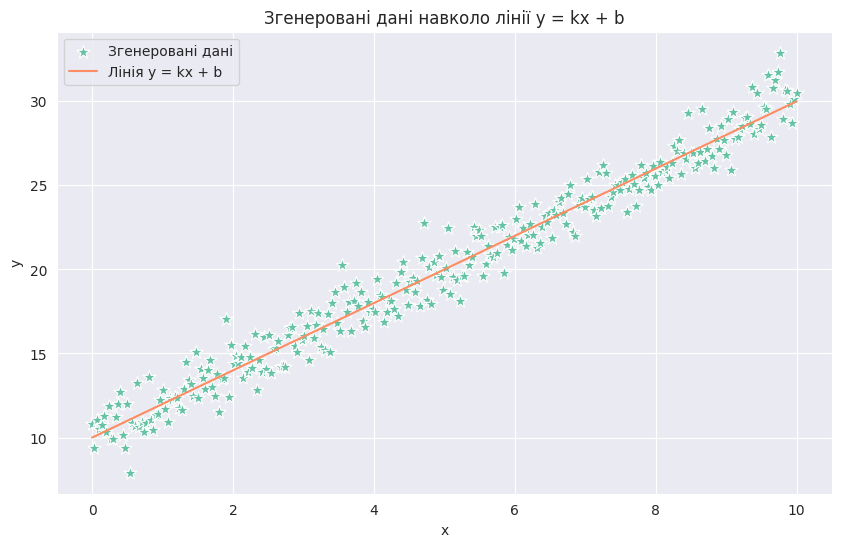

In [13]:
k = 2
b = 10
n = 300

x = np.linspace(0, 10, n)
noise = np.random.normal(0, 1, n)

y = k * x + b + noise
y_line_plot = k * x + b

sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))

sns.scatterplot(x=x, y=y, label='Згенеровані дані', marker='*', s=100, color=sns.color_palette("Set2")[0])
sns.lineplot(x=x, y=y_line_plot, label='Лінія y = kx + b', color=sns.color_palette("Set2")[1])
        
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Згенеровані дані навколо лінії y = kx + b')
plt.show()

Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних
оцінок kk та bb.

In [14]:
def least_squares_method(x, y):
    X = np.vstack([x, np.ones(len(x))]).T
    k, b = np.linalg.lstsq(X, y, rcond=None)[0]
    
    return k, b

def least_squares_method_form(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    k = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)
    b = y_mean - k * x_mean
    
    return k, b

In [15]:
k_squares, b_squares = least_squares_method(x, y)
k_polyfit, b_polyfit = np.polyfit(x, y, 1)


print(f"Початкове значення k: {k}, b: {b}")
print(f"Розрахункове значення методу найменших квадратів k: {k_squares}, b: {b_squares}")
print(f"Розрахункове значення функції кускового поліфіту k: {k_polyfit}, b: {b_polyfit}")

Початкове значення k: 2, b: 10
Розрахункове значення методу найменших квадратів k: 2.002822343983319, b: 10.026019979109606
Розрахункове значення функції кускового поліфіту k: 2.002822343983321, b: 10.026019979109607


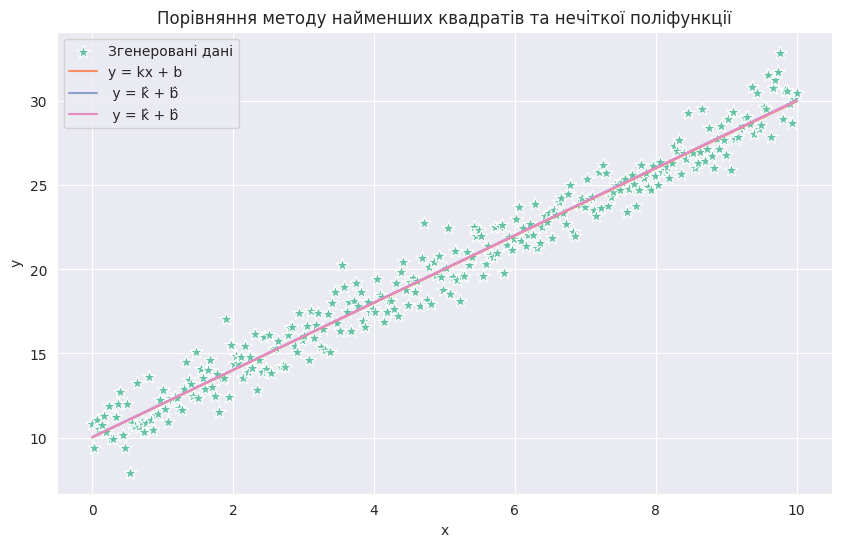

In [16]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))

sns.scatterplot(x=x, y=y, label='Згенеровані дані', marker='*', s=100, color=sns.color_palette("Set2")[0])
sns.lineplot(x=x, y=y_line_plot, label='y = kx + b', color=sns.color_palette("Set2")[1])
sns.lineplot(x=x, y=k_squares * x + b_squares, label=' y = k̂ + b̂ ', color=sns.color_palette("Set2")[2])
sns.lineplot(x=x, y=k_polyfit * x + b_polyfit, label=' y = k̂ + b̂ ', color=sns.color_palette("Set2")[3])
        
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Порівняння методу найменших квадратів та нечіткої поліфункції')
plt.show()

2 завдання

Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних
оцінок kk та bb

In [17]:
def gradient_descent(x, y, learning_rate=0.01, n_iter=1000, review=0.0001):
    k = 0
    b = 0
    n = len(x)
    mistakes = []

    for i in range(n_iter):
        y_pred = k * x + b
        mistake = y_pred - y
        mean_mistake = (1 / n) * np.sum(mistake ** 2)
        mistakes.append(mean_mistake)
        k_gradient = (2 / n) * np.dot(mistake, x)
        b_gradient = (2 / n) * np.sum(mistake)
        k -= learning_rate * k_gradient
        b -= learning_rate * b_gradient

        if i > 0 and abs(mistakes[-1] - mistakes[-2]) < review:
            print(f"Градієнтний спуск зупинено на ітерації {i} через мінімальну зміну помилки")
            break

    return k, b, mistakes

learning_rate = 0.01
n_iteration = 1000
k_gd, b_gd, mistakes = gradient_descent(x, y, learning_rate, n_iteration)


print(f"Розрахункове значення (gradient_descent) k: {k_gd}, b: {b_gd}")

Градієнтний спуск зупинено на ітерації 784 через мінімальну зміну помилки
Розрахункове значення (gradient_descent) k: 2.0328287199662696, b: 9.827117475045663


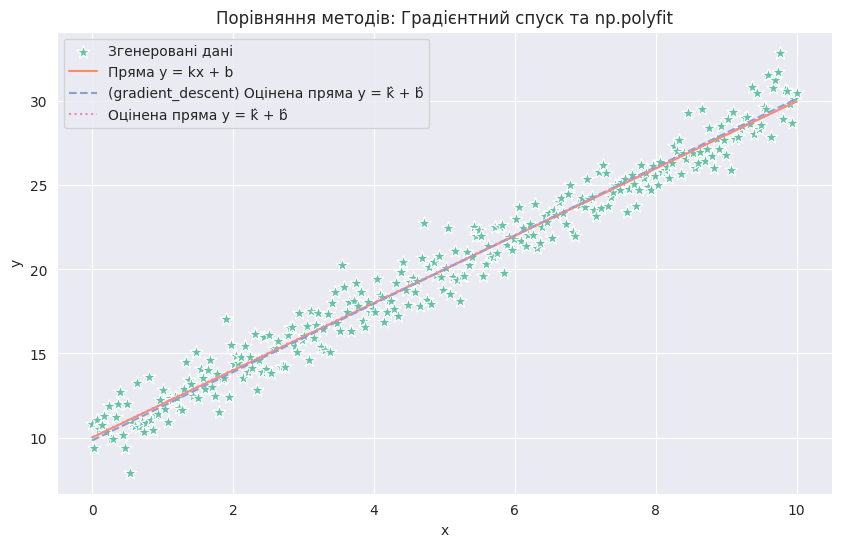

In [18]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))

sns.scatterplot(x=x, y=y, label='Згенеровані дані', marker='*', s=100, color=sns.color_palette("Set2")[0])
sns.lineplot(x=x, y=y_line_plot, label='Пряма y = kx + b', color=sns.color_palette("Set2")[1])
sns.lineplot(x=x, y=k_gd * x + b_gd, label='(gradient_descent) Оцінена пряма y = k̂ + b̂', color=sns.color_palette("Set2")[2], linestyle='dashed')
sns.lineplot(x=x, y=k_polyfit * x + b_polyfit, label='Оцінена пряма y = k̂ + b̂', color=sns.color_palette("Set2")[3], linestyle='dotted')
        
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Порівняння методів: Градієнтний спуск та np.polyfit')
plt.show()

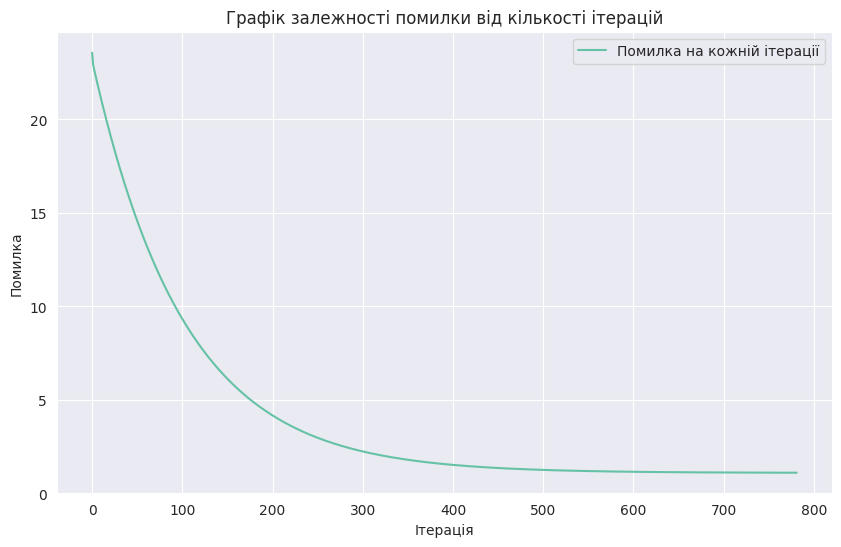

In [19]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))

sns.lineplot(x=range(len(mistakes[3:])), y=mistakes[3:], label='Помилка на кожній ітерації', color=sns.color_palette("Set2")[0])

plt.xlabel('Ітерація')
plt.ylabel('Помилка')
plt.legend()
plt.title('Графік залежності помилки від кількості ітерацій')
plt.show()